In [4]:
#df_raw=pd.read_csv('/Volumes/My Passport/COURSES/Dataviz/BasicCompanyDataAsOneFile-2021-12-01.csv')
#df_raw=df_raw.loc[df_raw['CountryOfOrigin']=='United Kingdom']
#df_raw['IncorporationDate']=pd.to_datetime(df_raw['IncorporationDate'],format="%d/%m/%Y",errors='coerce')
#df_raw.dropna(subset=['IncorporationDate'],inplace=True)

/Users/nikigelkott/opt/anaconda3/envs/value/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (41,42,43,44,45,46,47,48,49,50,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
#columns=['CompanyCategory','RegAddress.PostCode'
       #  'CountryOfOrigin',
        # 'Accounts.AccountCategory','SICCode.SicText_1','IncorporationDate']

In [9]:
#df_raw=df_raw[columns]

In [13]:
#df_raw.to_pickle('df_raw.pkl')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import rc
import matplotlib.dates as mdates

In [2]:
with open('df_raw.pkl', 'rb') as f:
    df_raw = pickle.load(f)

In [8]:
df_modern=df_raw.loc[df_raw['IncorporationDate']>pd.Timestamp(2017, 1, 1)]

In [21]:
###### CODE FOR SUBPLOT 1

#Retrieve SIC Number without words
sic_str=df_modern['SICCode.SicText_1'].str.split()
df_modern['SICCode1']=sic_str.apply(lambda x: x[0])

#Open file where SIC codes are aggregated into corresponding Industries and get ready to merge dataframes
sic=pd.read_csv('SIC07_CH_condensed_list_en.csv')
sic=sic.loc[:,('Industry','SIC Code')]
sic.columns=['Industry','SICCode1']
sic['SICCode1']=sic['SICCode1'].apply(lambda x: str(x))
merged_df = pd.merge(df_modern,sic,on='SICCode1')

#Obtain number of companies incorporated per month
count_per_month=df_raw['IncorporationDate'].groupby(df_raw['IncorporationDate'].dt.to_period("M")).agg('count')

#Create a separate dataframe with counts
timeline=pd.DataFrame(count_per_month)
timeline.columns=['Number']
timeline=timeline.reset_index() 
timeline['IncorporationDate'] = timeline['IncorporationDate'].dt.to_timestamp()

#Pick only those companies incorporated after 1990 for analysis per month
timeline=timeline.loc[timeline['IncorporationDate']>pd.Timestamp(1990, 1, 1)]

##### CODE FOR SUBPLOT 2
#Pick recent data
merged_df=merged_df.loc[merged_df['IncorporationDate']>=pd.Timestamp(2019, 1, 1)]
count_per_industry=merged_df.groupby([merged_df.IncorporationDate.dt.to_period("M"), 'Industry']).size()
count_per_industry=pd.DataFrame(count_per_industry)
count_per_industry=count_per_industry.reset_index()
count_per_industry.columns=['IncorporationDate', 'Industry', 'count']

#Prepair the dataframe for heatmap
pivot=count_per_industry.pivot(index='Industry', columns='IncorporationDate', values='count')
percentage_change=pivot.pct_change(fill_method='ffill',axis='columns')
percentage_change=percentage_change.reset_index()
percentage_change=percentage_change.set_index('Industry')
percentage_change.index.name = None
percentage_change.columns.name=None

/var/folders/lp/kfk0rkcj6bj31b_4y46369qr0000gn/T/ipykernel_60608/1681538580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modern['SICCode1']=sic_str.apply(lambda x: x[0])


In [ ]:
count_per_industry.loc[]

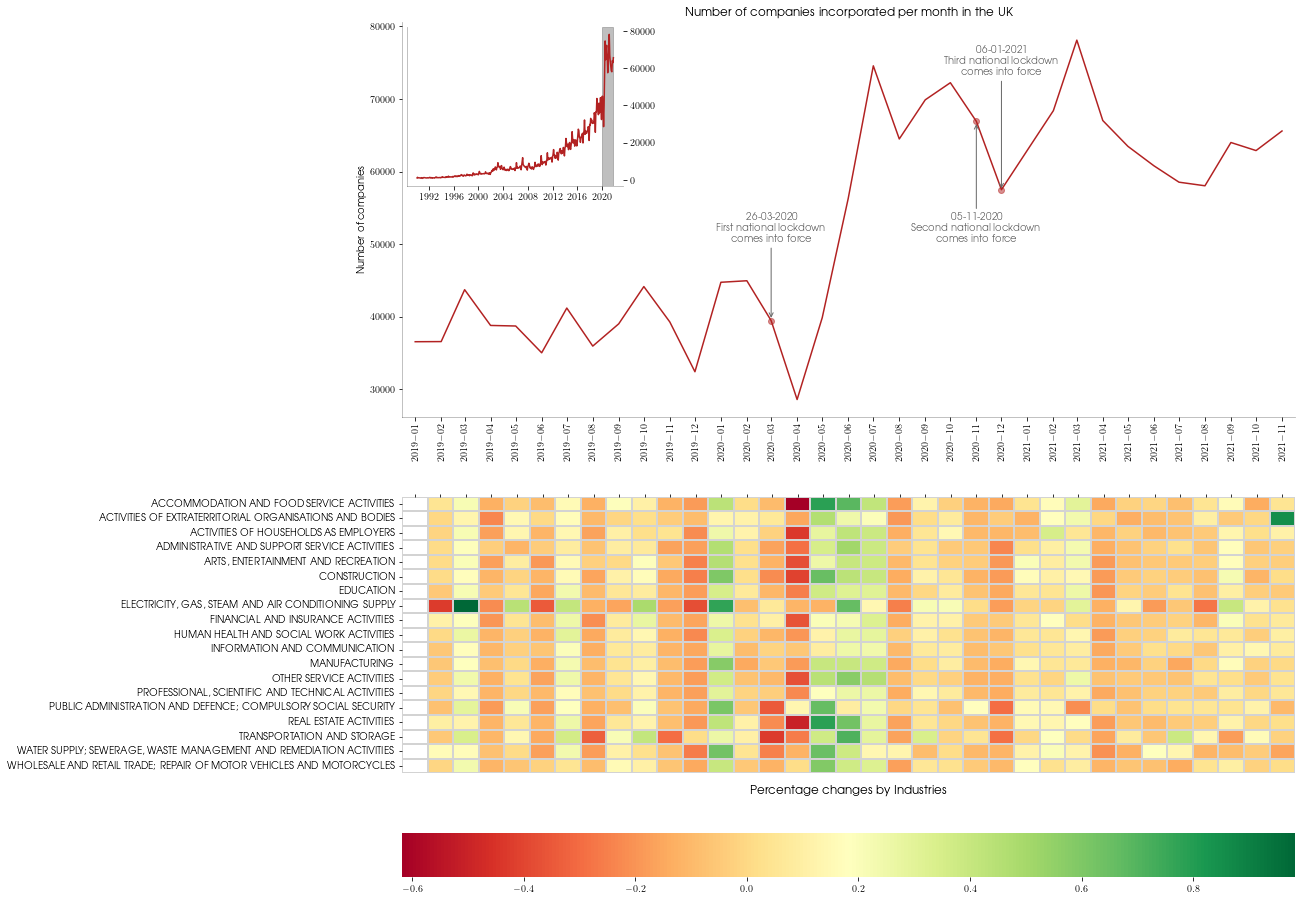

In [23]:
df=timeline.copy()
rc('font',**{'family':'sans-serif','sans-serif':['Avant Garde']})
rc('text', usetex=True)
fig=plt.figure(figsize=(16, 16))

##### SUBPLOT1
ax = fig.add_subplot(211)
slice = ((df['IncorporationDate'] >= pd.Timestamp(2019, 1, 1)) &
         (df['IncorporationDate'] <= pd.Timestamp(2021, 11, 1)))
t = df.loc[slice, 'IncorporationDate']
dji = df.loc[slice, 'Number']

# plot data
ax.plot(t, dji, color='firebrick')

### Critical events
sep = 100
# First national lockdown
lb = pd.Timestamp(1990, 1, 1)
l1 = pd.Timestamp(2020,3,1)
l1_y = df.loc[df['IncorporationDate'] == l1,'Number'].values
ax.annotate(" 26-03-2020 \n First national lockdown \n comes into force",
            xy=(l1, l1_y + sep), xycoords='data',
            xytext=(l1, 50000), textcoords='data',
            color='dimgrey',
            va="bottom", ha="center",
            arrowprops=dict(arrowstyle="->", ec='dimgrey',
                            connectionstyle="arc3"),)
ax.scatter(l1, l1_y, marker='o', color='firebrick', alpha=0.5)

# Second national lockdown 
fc = pd.Timestamp(2020,11,1)
fc_y = df.loc[df['IncorporationDate'] == fc,'Number'].values
ax.annotate(" 05-11-2020 \n  Second national lockdown \n comes into force",
            xy=(fc, fc_y - sep), xycoords='data',
            xytext=(fc, 50000), textcoords='data',
            color='dimgrey',
            va="bottom", ha="center",
            arrowprops=dict(arrowstyle="->", ec='dimgrey',
                            connectionstyle="arc3"),)
ax.scatter(fc, fc_y, marker='o', color='firebrick', alpha=0.5)
# Third national lockdown
l3 = pd.Timestamp(2020,12,1)
l3_y = df.loc[df['IncorporationDate'] == l3,'Number'].values
ax.annotate(" 06-01-2021 \n  Third national lockdown \n comes into force",
            xy=(l3, l3_y - sep), xycoords='data',
            xytext=(l3, 73000), textcoords='data',
            color='dimgrey',
            va="bottom", ha="center",
            arrowprops=dict(arrowstyle="->", ec='dimgrey',
                            connectionstyle="arc3"),)
ax.scatter(l3, l3_y, marker='o', color='firebrick', alpha=0.5)
# lighten borders
ax.spines["top"].set_alpha(0)
ax.spines["bottom"].set_alpha(.3)
ax.spines["right"].set_alpha(0)
ax.spines["left"].set_alpha(.3)
ax.margins(x=0.015)
# axes
ax.set_title(r'Number of companies incorporated per month in the UK')
ax.set_ylabel(r'Number of companies')
ax.xaxis.set_ticks(t)
ax.xaxis.set_tick_params(rotation=90)

# draw graph in inset to show the data on the larger scale
axins = inset_axes(ax, width=3, height=2.2,loc=2)
axins.plot(df['IncorporationDate'], df['Number'], color='firebrick')
axins.axvspan(pd.Timestamp(2020, 1, 1), pd.Timestamp(2021, 11, 1),
              color='gray', alpha=0.5)
axins.yaxis.tick_right()
axins.spines["top"].set_alpha(0)
axins.spines["bottom"].set_alpha(.3)
axins.spines["right"].set_alpha(0)
axins.spines["left"].set_alpha(.3)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

##### SUBPLOT2
ax2= fig.add_subplot(212)
ax2 = sns.heatmap(percentage_change, 
                  cmap="RdYlGn", linewidth=0.05, 
                  linecolor='lightgrey'
                 ,cbar_kws = dict(use_gridspec=False,location="bottom"))
#ax2.xaxis.set_tick_params(rotation=90)
ax2.tick_params(axis = "x", which = "both", bottom = False, top = True)
ax2.set_xticklabels([])
plt.xlabel('')
plt.ylabel('')
ax2.set_title(r'Percentage changes by Industries',y=-0.1)
# save plot
#out_f = os.path.join(os.getcwd(), 'interrupted_time_series.pdf')
fig.savefig('chart_1.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)
#plt.show()